# LOAD DATA AND PROFILLING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bureau_balance_df = pd.read_csv('/content/dseb63_bureau_balance.csv')

In [ ]:
bureau_balance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
bureau_balance_df.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
bureau_df = pd.read_csv('/content/dseb63_bureau.csv')

In [ ]:
bureau_df.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


In [ ]:
application_train = pd.read_csv('/content/dseb63_application_train.csv')

In [ ]:
bureau_merged = application_train[['TARGET','SK_ID_CURR']].merge(bureau_df, on = 'SK_ID_CURR', how = 'left')
bureau_merged.head()

,TARGET,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,0,278621,5885877.0,Closed,currency 1,-2586.0,0.0,-2434.0,-2131.0,0.0,0.0,22248.0,0.0,0.0,0.0,Consumer credit,-2131.0,NaN
1,0,278621,5885878.0,Closed,currency 1,-1636.0,0.0,-540.0,-540.0,0.0,0.0,112500.0,0.0,0.0,0.0,Credit card,-540.0,NaN
2,0,278621,5885879.0,Closed,currency 1,-775.0,0.0,-420.0,-621.0,0.0,0.0,72652.5,0.0,0.0,0.0,Consumer credit,-550.0,NaN
3,0,278621,5885880.0,Active,currency 1,-606.0,0.0,1216.0,NaN,0.0,0.0,810000.0,0.0,810000.0,0.0,Credit card,-43.0,NaN
4,0,139008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bureau_balance_merged = bureau_merged.merge(bureau_balance_df, on = 'SK_ID_BUREAU', how = 'left')
bureau_balance_merged.head()

,TARGET,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
0,0,278621,5885877.0,Closed,currency 1,-2586.0,0.0,-2434.0,-2131.0,0.0,0.0,22248.0,0.0,0.0,0.0,Consumer credit,-2131.0,NaN,NaN,NaN
1,0,278621,5885878.0,Closed,currency 1,-1636.0,0.0,-540.0,-540.0,0.0,0.0,112500.0,0.0,0.0,0.0,Credit card,-540.0,NaN,NaN,NaN
2,0,278621,5885879.0,Closed,currency 1,-775.0,0.0,-420.0,-621.0,0.0,0.0,72652.5,0.0,0.0,0.0,Consumer credit,-550.0,NaN,NaN,NaN
3,0,278621,5885880.0,Active,currency 1,-606.0,0.0,1216.0,NaN,0.0,0.0,810000.0,0.0,810000.0,0.0,Credit card,-43.0,NaN,NaN,NaN
4,0,139008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import sys
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (17.9 MB)
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
profile_bureau_df = ProfileReport(bureau_balance_df, title="BUREAU_BALANCE", html={'style' : {'full_width':True}})
profile_bureau_df.to_file(output_file="bureau_balance.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/matplotlib/image.py:181: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile_bureau_df

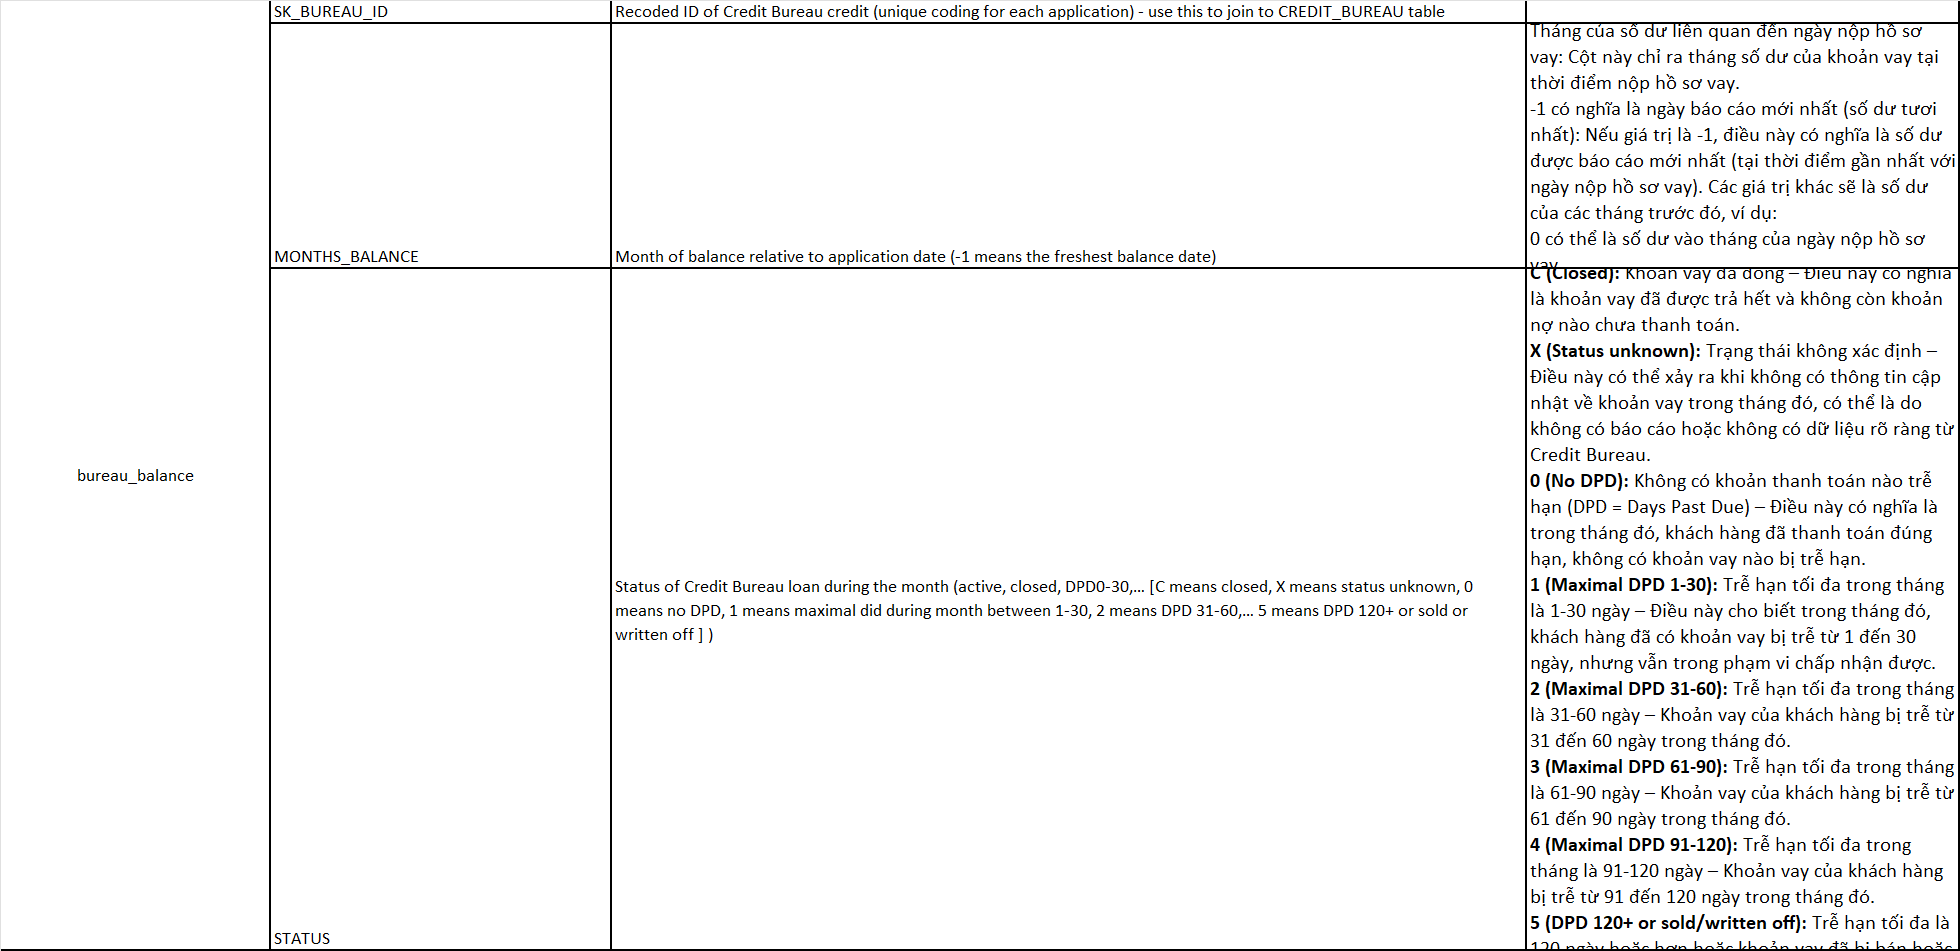

# Univariate

In [ ]:
(bureau_balance_df['STATUS'].value_counts()/len(bureau_df))*100

,count
STATUS,
C,931.328750
0,511.798202
X,396.531964
1,16.538788
5,4.258850
2,1.598212
3,0.609012
4,0.399024


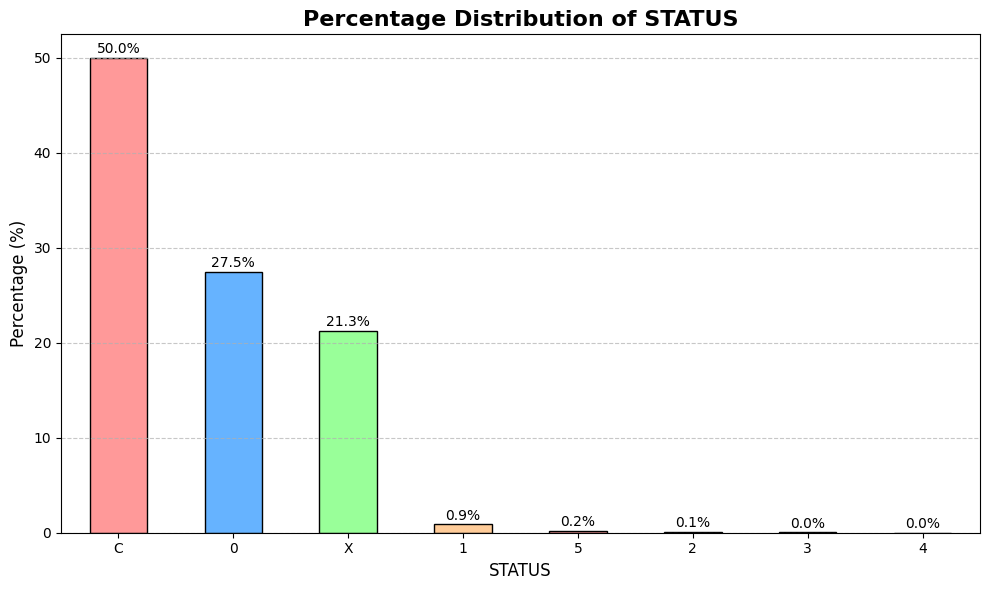

In [ ]:
# Tính tỷ lệ phần trăm các giá trị trong cột 'CREDIT_ACTIVE'
status_percentage = (bureau_balance_df['STATUS'].value_counts() / len(bureau_balance_df)) * 100

# Vẽ biểu đồ bar chart
plt.figure(figsize=(10, 6))
status_percentage.plot(
    kind='bar',
    color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],  # Tùy chỉnh màu sắc
    edgecolor='black'
)

# Cài đặt tiêu đề và nhãn
plt.title('Percentage Distribution of STATUS', fontsize=16, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('STATUS', fontsize=12)

# Hiển thị giá trị trên mỗi cột
for i, v in enumerate(status_percentage):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.xticks(rotation=0)  # Giữ nhãn trục x nằm ngang
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới nhẹ ở trục y
plt.tight_layout()  # Đảm bảo biểu đồ không bị cắt
plt.show()

Most of the loans are Closed in the Credit Bureau, which is followed by clients with 0 DPD and then by applicants whose status is unknown. We can conclude that there are very few annuity defaulters in the data.

<ipython-input-19-6ea41b6d11d0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bureau_balance_df[feature].dropna(),color=color, kde=True,bins=100)


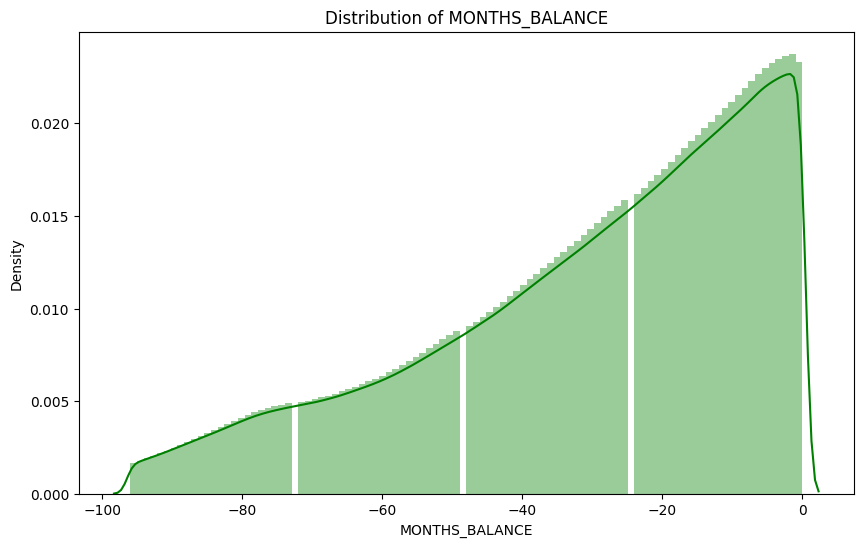

In [ ]:
def plot_b_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(bureau_balance_df[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

plot_b_distribution('MONTHS_BALANCE','green')

# Multivariate

In [ ]:
def plot_b_distribution_comp(var):
    # Filter data based on TARGET values
    t1 = bureau_balance_merged.loc[bureau_balance_merged['TARGET'] == 1]
    t0 = bureau_balance_merged.loc[bureau_balance_merged['TARGET'] == 0]

    # Set the style for the plot
    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 6))

    # Plot the KDE for TARGET = 1 and TARGET = 0 for each feature in the list
    for feature in var:
        sns.kdeplot(t1[feature], bw=0.5, label=f"{feature} - TARGET = 1", color='red')
        sns.kdeplot(t0[feature], bw=0.5, label=f"{feature} - TARGET = 0", color='blue')

    # Set the labels and legend
    plt.title('Density Plot of Multiple Features with TARGET = 1 and 0')
    plt.xlabel('Feature Values', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(title="TARGET", fontsize=12)

    # Show the plot
    plt.show()

<ipython-input-24-93fdfcbdde34>:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t1[feature], bw=0.5, label=f"{feature} - TARGET = 1", color='red')
<ipython-input-24-93fdfcbdde34>:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t0[feature], bw=0.5, label=f"{feature} - TARGET = 0", color='blue')


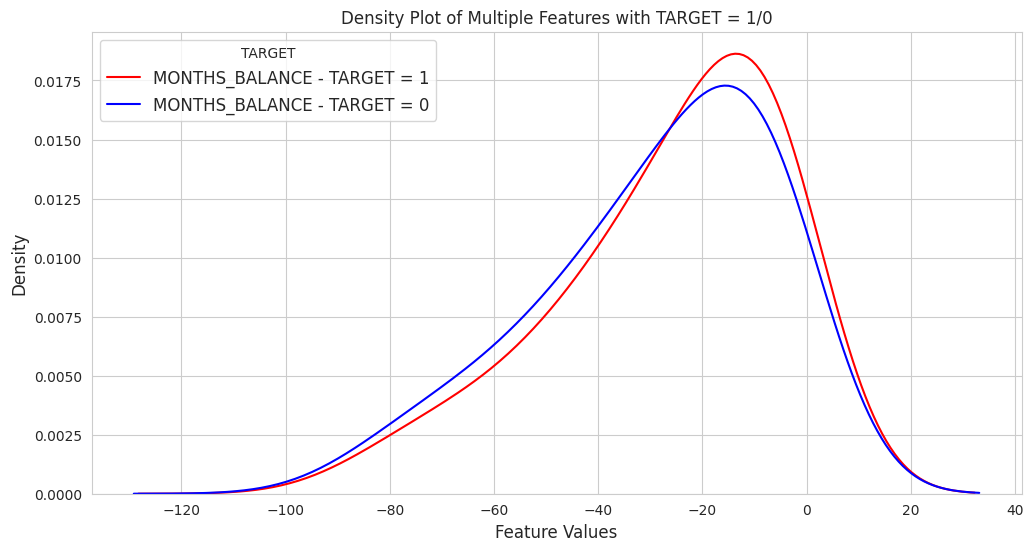

In [ ]:
var = ['MONTHS_BALANCE']

plot_b_distribution_comp(var)

The density curve for the `TARGET = 1` group (red) is shifted slightly to the right compared to the `TARGET = 0` group (blue). This indicates that high-risk clients (`TARGET = 1`) tend to have `MONTHS_BALANCE` values closer to the application date (smaller negative values).  In other words, their balance information is more recently updated compared to the low-risk group.

**Further Explanation:**

* **Negative MONTHS_BALANCE:** Negative values of `MONTHS_BALANCE` indicate that the balance was recorded *before* the application date. Values closer to 0 represent more recent balance updates.
* **Rightward Shift:** The red curve being shifted to the right means the `TARGET = 1` group tends to have smaller negative `MONTHS_BALANCE` values (closer to 0).

**Implications:**

While the difference is subtle, this insight suggests that more recent balance updates might be associated with higher credit risk. This could be because:

* High-risk clients have more recent credit activity.
* More recent balance information reflects the current financial situation more accurately, and this situation might be more negative for the high-risk group.

However, further analysis is needed to determine the exact cause of this difference and its impact on credit risk prediction.  Combining `MONTHS_BALANCE` with other variables might be beneficial for building a more accurate predictive model.


In [ ]:
# Calculate the percentage distribution for STATUS
status_percentage = bureau_balance_merged['STATUS'].value_counts(normalize=True) * 100
print("\nPercentage distribution of STATUS:")
print(status_percentage)


Percentage distribution of STATUS:
STATUS
C    47.798799
0    31.422967
X    19.273647
1     1.051099
5     0.281278
2     0.105923
3     0.040536
4     0.025752
Name: proportion, dtype: float64


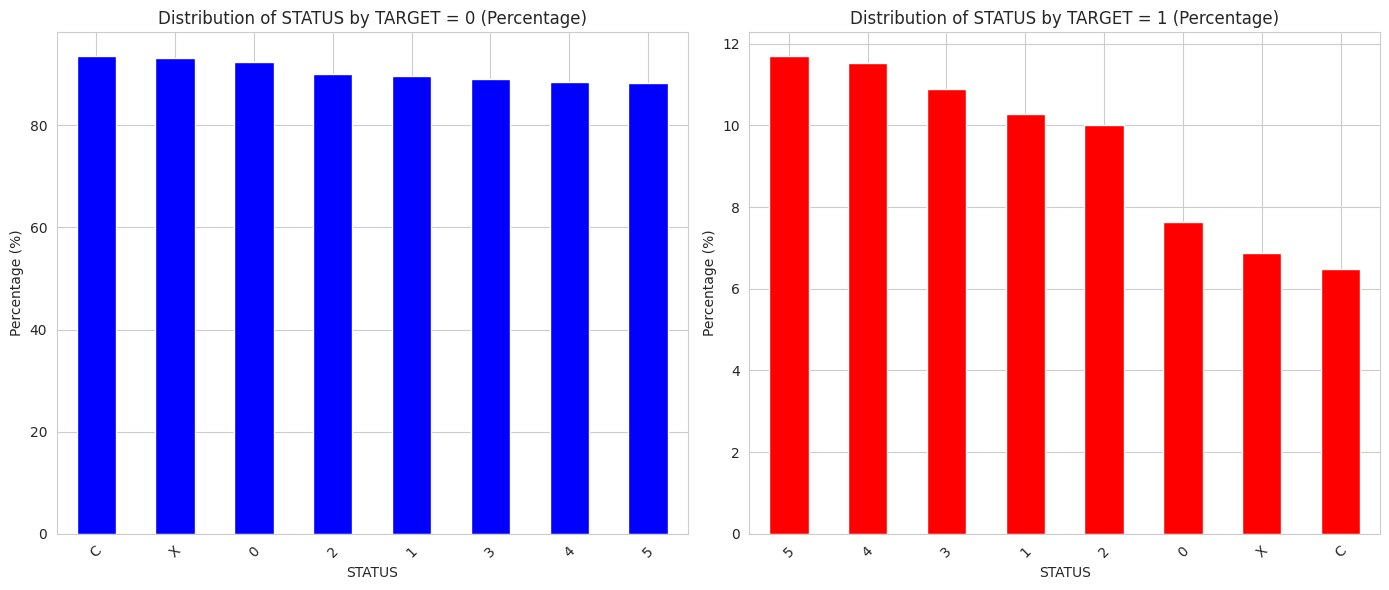

In [ ]:
# Calculate the percentage distribution for STATUS and TARGET
status_percentage = bureau_balance_merged.groupby(['STATUS', 'TARGET']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)

# Create the plot
plt.figure(figsize=(14, 6))

# Barplot for STATUS and TARGET = 0
plt.subplot(1, 2, 1)
status_percentage[0].sort_values(ascending = False).plot(kind='bar', color='blue', ax=plt.gca())
plt.title('Distribution of STATUS by TARGET = 0 (Percentage)')
plt.ylabel('Percentage (%)')
plt.xlabel('STATUS')
plt.xticks(rotation=45)

# Barplot for STATUS and TARGET = 1
plt.subplot(1, 2, 2)
status_percentage[1].sort_values(ascending = False).plot(kind='bar', color='red', ax=plt.gca())
plt.title('Distribution of STATUS by TARGET = 1 (Percentage)')
plt.ylabel('Percentage (%)')
plt.xlabel('STATUS')
plt.xticks(rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


**Distribution of STATUS for TARGET = 0 (Blue Chart)**:

- The values of STATUS (C, X, 0, 2, 1, 3, 4, 5) are distributed quite evenly, with a similar percentage for each (approximately above 80%).
This indicates that when TARGET = 0 (potentially representing a low-risk or no-event group), STATUS does not show significant variation across levels.
Distribution of STATUS for TARGET = 1 (Red Chart):

- The percentage distribution decreases progressively from higher to lower STATUS levels. STATUS = 5 and STATUS = 4 have the highest percentages (around 11-12%), while STATUS = C and STATUS = X have the lowest percentages.
This suggests that higher STATUS values (e.g., 5 and 4) may be strongly associated with TARGET = 1 (potentially representing a high-risk or event-occurring group).

**Comparison Between TARGET = 0 and TARGET = 1**:

- For TARGET = 0, STATUS levels do not have a significant impact on the percentage distribution.
- For TARGET = 1, STATUS levels show notable differentiation. Higher STATUS values (5, 4, 3) are more frequently associated with TARGET = 1, while lower STATUS levels (C, X, 0) appear less frequently.